<a href="https://colab.research.google.com/github/histofyi/api.histo.fyi/blob/main/Peptide_Classification_for_Nonamers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing an automatic classification of MHC bound nonamer peptide structures
Predicting the bound peptide strutcture of MHC molecules is challenging due to the concerted movements within the binding cleft, however given the large number of MHC Class I structures we should be able to find some correlations between sequence and structure of both the MHC class I molecule and the bound peptide. 


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Set the output display to have one digit for decimal places and limit it to
# printing 15 rows.
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15

peptide_angle_data = pd.read_csv("https://raw.githubusercontent.com/histofyi/notebooks/main/data/integer_nonamers.csv", 
                              sep=",", 
                              encoding='latin-1',
                              index_col = ["complex_id"])

# for some reason to look into it makes the final column a float and thinks there are some NaN issues. Check into this, but this works for now to get us going
peptide_angle_data.p9_phi = pd.to_numeric(peptide_angle_data.p9_phi, errors='coerce').fillna(0).astype(np.int64)

# Look a the first 5 columns just to eyeball the data
peptide_angle_data.head()



,p1_psi,p2_phi,p2_psi,p3_phi,p3_psi,p4_phi,p4_psi,p5_phi,p5_psi,p6_phi,p6_psi,p7_phi,p7_psi,p8_phi,p8_psi,p9_phi
complex_id,,,,,,,,,,,,,,,,
7mkb_1,108,154,297,129,304,345,282,145,238,153,241,125,226,139,289,296
6vma_1,144,158,278,175,289,166,288,128,310,165,283,148,278,148,276,288
7n6d_1,103,159,295,133,298,335,283,161,258,153,228,134,222,142,262,290
7n6d_2,103,160,296,139,299,345,291,179,212,162,226,138,226,142,269,291
7n6d_3,104,159,297,133,300,350,288,171,215,161,229,137,227,143,271,292


In [4]:
# Next, check the data shape, this should match the spreadsheet, don't forget the complex_id's aren't considered in this
rows, cols = peptide_angle_data.shape
print(f'There are {rows} rows and {cols} columns') 

There are 570 rows and 16 columns


In [6]:
# here we're checking that we've got the right number of the right sort of item, we've simplified the data so that all the angles are positive integers
for row in peptide_angle_data:
  items = [item for item in peptide_angle_data[row] if isinstance(item, int)]
  print('{angle} : {count} items'.format(angle = row, count = len(items)))
print(peptide_angle_data.dtypes)

p1_psi : 570 items
p2_phi : 570 items
p2_psi : 570 items
p3_phi : 570 items
p3_psi : 570 items
p4_phi : 570 items
p4_psi : 570 items
p5_phi : 570 items
p5_psi : 570 items
p6_phi : 570 items
p6_psi : 570 items
p7_phi : 570 items
p7_psi : 570 items
p8_phi : 570 items
p8_psi : 570 items
p9_phi : 570 items
p1_psi    int64
p2_phi    int64
p2_psi    int64
p3_phi    int64
p3_psi    int64
          ...  
p7_phi    int64
p7_psi    int64
p8_phi    int64
p8_psi    int64
p9_phi    int64
Length: 16, dtype: object


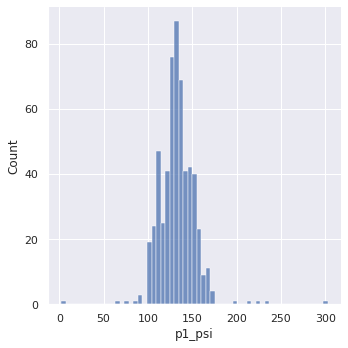

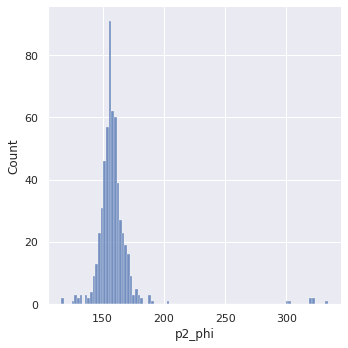

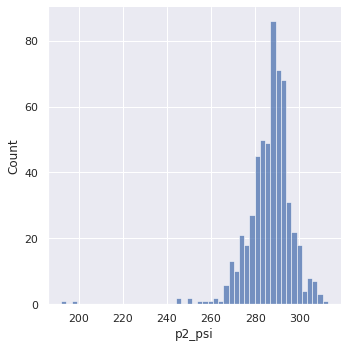

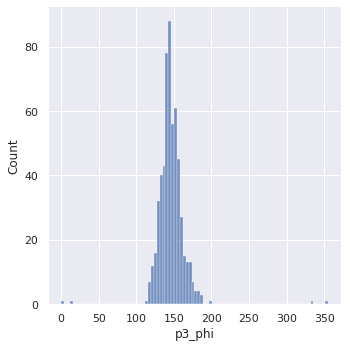

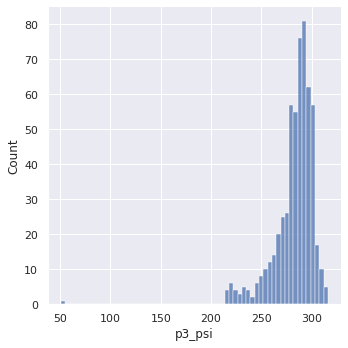

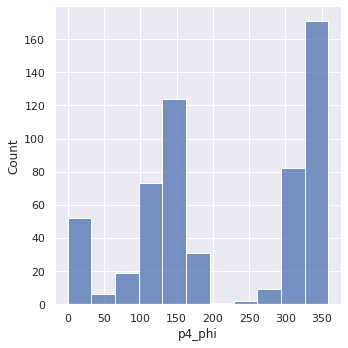

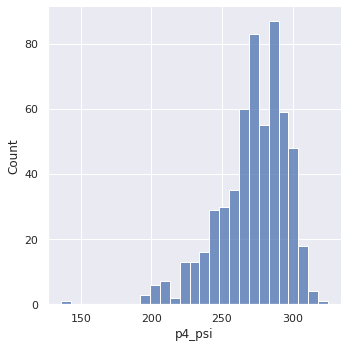

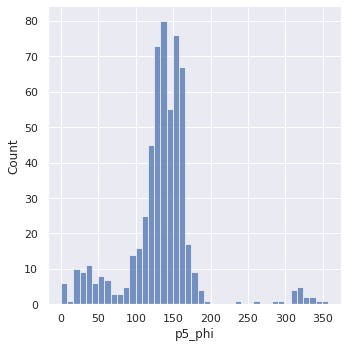

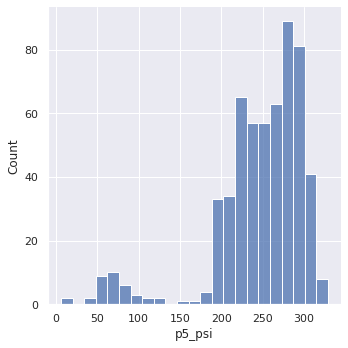

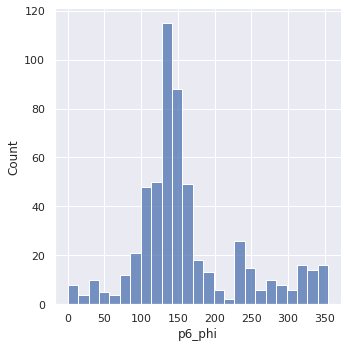

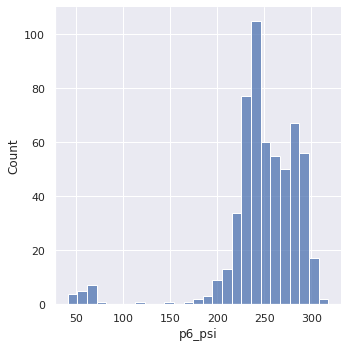

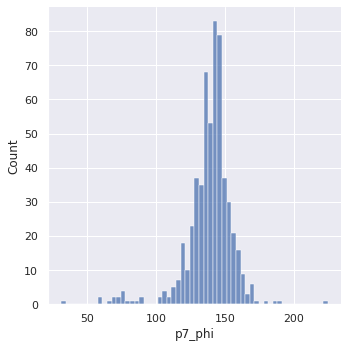

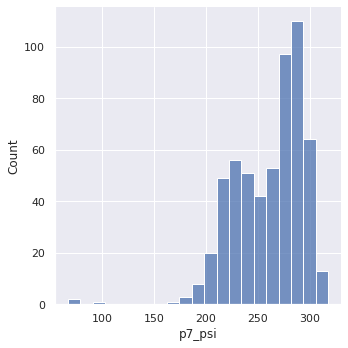

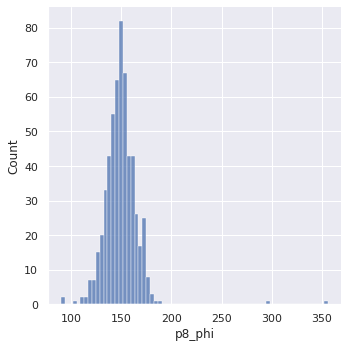

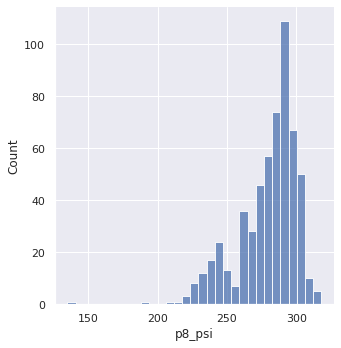

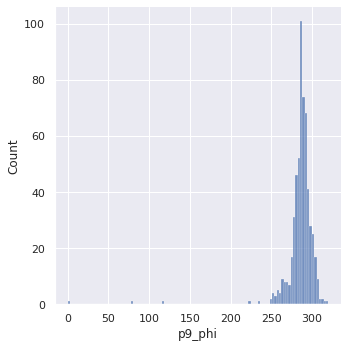

In [22]:
for row in peptide_angle_data:
  sns.displot(peptide_angle_data[row])

In [13]:
# now for the clustering, we're just doing a rough clustering to begin with, putting things into 20 buckets
number_of_clusters = 20
kmeans = KMeans(
  init="random",
  n_clusters=number_of_clusters,
  n_init=100,
  max_iter=300,
  random_state=42
)

kmeans.fit(peptide_angle_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=20, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [15]:
# these are the centres of the clusters, you could, in theory create a consensus peptide for each cluster by using these angles, can also look at deviation of a structure from these to see if there are outliers which are clustered
kmeans.cluster_centers_


array([[131.81, 156.45, 288.13, 150.39, 277.81, 163.84, 239.35,  36.39,
         72.97, 130.29, 283.29, 145.65, 271.68, 150.1 , 290.52, 283.68],
       [118.93, 158.03, 286.73, 142.33, 299.58, 329.74, 291.7 , 154.84,
        209.29, 130.37, 234.78, 141.53, 277.07, 145.97, 292.58, 285.97],
       [134.25, 159.  , 279.25, 158.75, 280.  , 294.5 , 278.25, 139.5 ,
         30.75,  88.75, 209.  , 116.5 , 240.75, 137.75, 269.  , 288.25],
       [125.64, 166.27, 285.73, 167.64, 236.73, 144.45, 274.91, 312.36,
        287.55, 296.18,  70.09, 142.45, 281.73, 154.18, 262.27, 288.64],
       [133.77, 154.6 , 285.25, 148.69, 263.5 , 124.15, 275.6 , 117.33,
        271.  , 331.5 , 261.1 , 141.25, 249.1 , 164.54, 275.94, 291.29],
       [159.  , 203.  , 285.  , 147.  ,  51.  , 329.  , 274.  , 155.  ,
        259.  , 164.  , 195.  ,  74.  , 217.  , 152.  , 234.  , 287.  ],
       [135.1 , 158.71, 287.32, 141.29, 284.12, 341.1 , 270.73, 136.07,
        288.46, 126.54, 258.98, 128.49, 231.8 , 141.  , 25

In [14]:
# how many iterations the K means ran through to generate the clusters

kmeans.n_iter_


16

In [12]:
# now it gets interesting as we can see what is clustered with what

cluster_map = pd.DataFrame()
cluster_map['data_index'] = peptide_angle_data.index.values
cluster_map['cluster'] = kmeans.labels_

i = 0

clusters = {}
while i < number_of_clusters:
  this_cluster = []
  for item in cluster_map[cluster_map.cluster == i]['data_index']:
      pdb_code = item.split('_')[0]
      if pdb_code not in this_cluster:
        this_cluster.append(pdb_code)
  print (this_cluster)
  print (len(this_cluster))
  clusters[i] = this_cluster
  i += 1


['6vb0', '6vb1', '6vb2', '6m24', '5xos', '5f1i', '5enw', '5eo1', '5eo0', '4u1j', '4u1h', '4pgb', '4l8d', '3qfd', '2guo', '2gtw', '2gtz', '1jht', '1vad', '2vab']
20
['7kgo', '6o4y', '6o4z', '6q3k', '5ylx', '6ggm', '5e00', '5f9j', '5meq', '5mer', '4pg9', '4pge', '4pgd', '4nqx', '4l3c', '4l29', '3mr9', '3mrg', '3mrb', '3mrl', '3myj', '3hpj', '2x4r', '3kla', '3gsv', '3gsu', '3gsr', '3gsq', '3gso', '3gsx', '3gsw', '3ft4', '3d25', '1xr8', '1s9w', '1s9x', '1s9y']
37
['3v5d', '3pwv', '2bst', '1sys']
4
['6l9m', '6l9n', '4u1s', '3mrd', '3jts']
5
['6xqa', '7jyw', '6kwn', '6kwk', '6gl1', '6a6h', '6mt3', '6mt4', '6mt5', '6mt6', '6d2t', '5wmq', '5nq1', '5gsb', '5gr7', '5gsr', '5ind', '5inc', '5im7', '4u1n', '4u1m', '4qru', '3x13', '3x14', '4qrs', '3mrc', '3kpn', '3kpl', '3kpp', '3czf', '3bvn', '2v2x', '2a83', '1vgk', '1wbz', '1uxs', '1cg9', '1ce6', '1a9b', '1a9e']
40
['5ib3']
1
['7n1b', '7n1e', '7p3e', '7m8u', '7lg3', '7kgp', '6y26', '6ujq', '6vmx', '6joz', '6pyj', '6pyv', '6pz5', '6pyw', '5vwj', '5